In [ ]:
%%bash
if [ ! -d params ]; then
  pip install git+https://github.com/hunarbatra/ColabDesign.git
  mkdir params
  curl -fsSL https://storage.googleapis.com/alphafold/alphafold_params_2021-07-14.tar | tar x -C params
  echo "starting..."
  for W in openfold_model_ptm_1 openfold_model_ptm_2 openfold_model_no_templ_ptm_1
  do 
    wget -qnc https://files.ipd.uw.edu/krypton/openfold/${W}.npz -P params; 
  done
fi

In [ ]:
!pip3 install alphafold

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
from colabdesign import mk_afdesign_model, clear_mem
from IPython.display import HTML
from google.colab import files
import numpy as np
from alphafold.common import residue_constants

def get_pdb(pdb_code="",alphafold_model=False):
  if pdb_code is None or pdb_code == "":
    upload_dict = files.upload()
    pdb_string = upload_dict[list(upload_dict.keys())[0]]
    with open("tmp.pdb","wb") as out: out.write(pdb_string)
    return "tmp.pdb"
  else:
    if alphafold_model:
      os.system(f"wget -qnc https://alphafold.ebi.ac.uk/files/AF-{pdb_code}-F1-model_v2.pdb")
      return f"AF-{pdb_code}-F1-model_v2.pdb"      
    else:
      os.system(f"wget -qnc https://files.rcsb.org/view/{pdb_code}.pdb")
      return f"{pdb_code}.pdb"

In [ ]:
clear_mem()
model = mk_afdesign_model(protocol="fixbb",
                          crop_len=128,
                          use_templates=False) # set True to constrain structure

pdb_filename = get_pdb("7LWV")
model.prep_inputs(pdb_filename, chain="A")

print("length",  model._len)

length 993


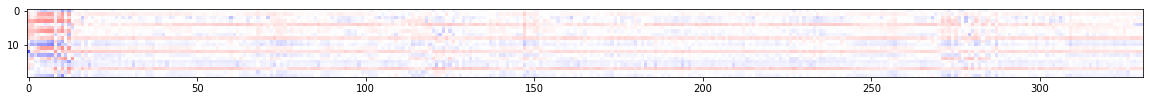

In [ ]:
import matplotlib.pyplot as plt

bias = np.loadtxt("esm2-bias.txt")
plt.rcParams['figure.figsize'] = (20, 3)

plt.imshow(bias[:331].T,cmap="bwr_r",vmin=-10,vmax=10)

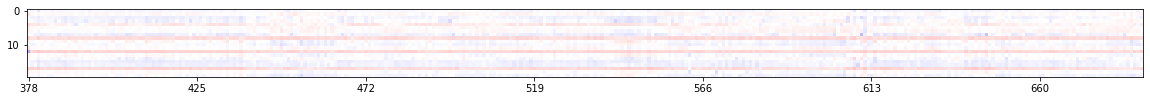

In [ ]:
fig, ax1 = plt.subplots(1,1)
nums = [i for i in range(331,662,47)]
ax1.set_xticklabels(nums, minor=False)

plt.imshow(bias[331:662].T,cmap="bwr_r",vmin=-10,vmax=10)

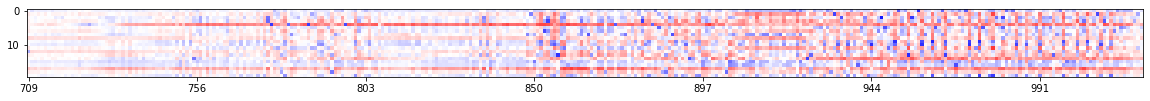

In [ ]:
fig, ax1 = plt.subplots(1,1)
nums = [i for i in range(662,993,47)]
ax1.set_xticklabels(nums, minor=False)

plt.imshow(bias[662:993].T,cmap="bwr_r",vmin=-10,vmax=10)

In [ ]:
model.restart()
model.opt["bias"] = bias 
model.opt["num_recycles"] = 1

model.design_3stage(50,50,10)

1 models [4] recycles 1 hard 0.00 soft 0.02 temp 1.00 seqid 0.04 loss 2.11 plddt 0.63 pae 0.81 dgram_cce 2.09 ptm 0.10 rmsd 27.22
['MLLLSAFFALVDSTITSFIVVVLVNISEVQISFSQLFMADGTSAELANPFAFRRIVPLPYQTTTVNNSLIWVTTKIIFSAGGEFTGKYSYKFFYANIEQNKISTGGLAVNLSPQMYLYDPAVNTQEGNFPGEGQPPPFRRVISWNDQLVWLILCKISSIPQNSGRKTRRSFIKQQESLNAITPFYVSCTAVGGSLSIVFVSNFASKVGKTDEGSDLTCCLDPKDGDNVPNFELPGDTYIWYPPIEEVDTKECVLDYEFKTEHDHSDLFTKHHACTIDLDGEAASCLSIFYVMTSEDSLNAQRYFTNANIEIFALVQQAKDGYHLFFSITCSRVGKPSVSEGFDKDCANKFDGFVINRFRSDNHSFCGDSGIRNSAYYRDLVDKSGDKDPRLGFFNGRELNLLEIRNPFCGQCISVFDSVGIFPRRCKYTVVDAPAVGSPPFFIILSCSDAFNRNRGACMRISTPPLGRDLVKRLPLPVIGGSAAQVLETAPSWTNKNVTSNGYRFQHNANLGRSIIDYANIYDVGVVCGPEDDSKFSYCFAFARVTWVISEQKTLFYVSTVLCCPLKKKTCVTIDLGLGIVVNLNNTVAPKPAIYCQWDSSYPAINLRSNLLVIDASKNTWTTISGGTPPVTEGGTQILPTETDAYNLGSFARVLLVIYAESDYSKRVGGLPCAYTSGCRIIPRSSSTTSDARSATNDSIVMSALNKPVTINQNNPARKFNSVSKVAVSAISIDCTKYICGTSQVCQRLMKGYGSVCKSVNEALERYTGTLEIYLIEIINQVSPNSQLQNLSAYTSFNISSFTTEKEVRIGRSIIEDILFEKVTETDAGFTREYKECKEGPDIRDLICSQFYQGITQLPPIITNSMAT

In [ ]:
HTML(model.animate())

In [ ]:
model.get_seqs()

['MCEIELVVEPTEARCQDPTMHFSTGHQGCCCDATAVMLALAALIRINRINRNCNNNNNNSNSNNCCCCNSCCSSCSNSNSSSNSSSNSNCTNCHHCCHHWQQQAARPPPPRAARRVYRCNITTTNSTNNTTTTTTNSSSSGGSSSTTCCTCCTTTCTTTTTTIIVLHAAAQQQRQIIRTSNNTNTNNNSSSNSNSNPPRNPFNWYIFLWPHPPFPQHYIYCILRYAAAIAHCMMTMMQDVEQVVYGMTTNPPTTGNNNNGTSQTVNTSTTNTTTSTTTSSTTSSTTSNTGSNNNTTSTTNTSNGLSTYCYTTNYNTDTNNNTTTCTSSTNPNNTDNTDGNGNWTYTNNTTNSTTTTSTVCTTCNTGTTTNTSNSSSSNSGTNTTSNNNCTRNVRVIQVILVLLRMLQMQQQRQNILWIQDDNEADVNTAPGCMANTTCNTNTSSSCSSCNSTTCSSNSSSSSGSNTTTTCTSSSSSTTTTTTTNTSSTNCCYCVCVVVTLVTTGNSSTNTTLTVCLLVLVLLLLALADELVLLLVLLRLRRTTSNNQTTTVTLVLILYLRQLAVVVVVVVTQQTTQTTNTNNSDDQPDDDPDPPPDPPDDPPDDPGDNPNSSSSNSSNNNPGGTYYTCHNPRHRVRQHVVVLLRELVLLLLLLLLLVQINNNNNNSNSSSSSNSSSNTKNVISLKLLRQLLRRLRQRQQPEPEPEEEEQEQLQEQLLELLLQLRLHRRNNNNSSTSSSSSSSSSSSSSSSSSSSSSNTNNHRKKLRRKLIEHAKLQLLEELEEQEQEQDETEDEELLALLLLLLLLLLLLLLTFILIFFTSSTNSSSSGDDDDTEEAILVIIIILLLLWLWALLLILQWALQLQQMQRKLRRLRRSHSSDDNPPTSTTGPGGTGTCTTCCCCCTGGDSGNPPPDCNGNNNDDGPDDGPDDPPNGPPPNNCGNAPGSHNNYCYWYCYYYYYAYYYYLYAIRLHTGQEAGDDGLDVETFHCFGEQ']

In [ ]:
model.save_pdb(f"{model.protocol}.pdb")
model.plot_pdb()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol